
Implementation based on "CUR matrix decompositions for improved data analysis" by Mahoney and Drineas 

Paper link: https://www.pnas.org/content/pnas/106/3/697.full.pdf

Code: Ahmed Almostafa Gashgash


In [115]:
import numpy as np
import time
import random
from numpy.linalg import pinv
import matplotlib.pyplot as plt



In [86]:
def column_select(A,k,eps):
        
        """"
        INPUT: A: n x m matrix, rank: desired low rank, eps: error parameter
        OUTPUT: returns k most representative columns of matrix A
        """
        
        c = (k * np.log(k)) / (eps**2)                                # c=O(klogk/e^2)
        U,S,Vt = np.linalg.svd(A,full_matrices = False)             # Compute SVD
        Vt = Vt[:k,:]                                               # Truncated columns of V
        pr = (1/k)*(Vt**2).sum(axis=0)                              # Prob of keeping jth column of A
        pr = [min(1,c*p) for p in pr]
        
        index_select = [ (random.random() < p) for p in pr]
        columns = A[:,index_select]
        columns = columns[:,:k]
        
        return columns
    

In [97]:
def CUR_decompose(A, rank, eps):
    
    """
    INPUT: A: n x m matrix, rank: desired low rank, eps: error parameter
    OUTPUT: returns C, U and R resulting from the CUR decomposition of the matrix.
    """
    # Get size
    m = A.shape[0]
    n = A.shape[1]
    k = rank
    
    # Initialize C and R 
    C = np.zeros((m, k))
    R = np.zeros((rank, n))
    
    if k>min(m,n):
        print("ERROR: rank cannot exceed matrix dimensions.\n")
        return;
    
    C = column_select(A,k,eps)
    R = column_select(A.T,k,eps)
    U = pinv(C) @ A @ pinv(R.T)
    
    return C,U,R
        

In [57]:
# Example 
# Upload Data
data = pd.read_csv("./day.csv",sep=',',header=None) 
# Preview Data
#data

In [58]:
# Clean data & preview
data = data.drop([0,1,13,14],axis=1)  
data = data.drop([0],axis=0)

In [35]:
#Convert to numpoy matrix
data_matrix = data.as_matrix()

#convert to float, shuffle  and split
data_matrix = data_matrix.astype(float)
np.random.shuffle(data_matrix)


A=data_matrix


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [133]:
n_trials = 100 

def frobenius_error(A,CUR):
    return np.sqrt (((A-CUR)**2).sum())



rank_error = np.zeros(11)
# alternate rank
for k in range(11):
    
    error = np.zeros(n_trials)

    for trial in range(n_trials):
        C,U,R = CUR_decompose(A,k+1,1)
        error[trial]=frobenius_error(A,C@U@R.T)
        
    rank_error[k] = np.mean(error)

print(rank_error)

[132555.52872527  52110.44832515  17700.07417859  18734.43938461
  20102.17902161  16271.28933477   9599.9854207   20113.14024678
  20972.35414582  24081.96180435  23993.77807086]


Text(0, 0.5, 'Frobenius Error')

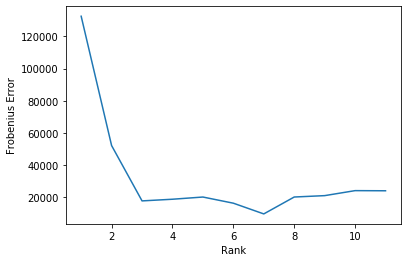

In [139]:
k = [i+1 for i in range(11)]
plt.plot(k, rank_error)
plt.xlabel('Rank')
plt.ylabel('Frobenius Error')
